In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import forecast_arima
reload(forecast_arima)
from forecast_arima import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *


path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
df_holidays=pd.read_csv(path+f"\\holidays.csv")
iOoS=28
df_data=pd.read_pickle(Y_path)
df_data.drop(columns=['2011-01-29','2011-01-30'],inplace=True) #start on Monday  #TODO move this to temporal part in getmY

df_data_eval=pd.read_pickle(Y_path_eval)
slices=[7,1]

# l_methods=["bottom_up", "top_down_ph" ,"top_down_hp", 'wls',
#                   "ols" ,'mint_sample','mint_shrink','mint_diag']
l_methods_temporal=["bottom_up", "top_down_ph" ,"top_down_hp","wls_svar" , "ols",
                    "wls_acov", "wls_struct" , "wls_hvar" , 
                    "mint_sample", "mint_shrink" , "mind_diag" ]




# Cross Validation

for each leaf do temporal reconciliation with certain methods
then visualize the results

In [ ]:
transform='log'
dfHolidays=df_holidays
# in highest freq
initial=1911-7*50
period=7
horizon=7   
#convert to units of lowest freq
initial=time_converter(initial, from_unit='D' , to_unit='W')
period=time_converter(period, from_unit='D' , to_unit='W')
horizon=time_converter(horizon, from_unit='D' , to_unit='W')   



forecast_method='prophet'
iOoS=7
l_methods_temporal=["bottom_up", "top_down_ph" ,"top_down_hp","wls_svar" , "ols",
                    "wls_acov", "wls_struct" , "wls_hvar" , "mint_sample", "mint_shrink"]
dddCVOutputs={}


tree_spatial=Tree( dfData= df_data , sType='spatial') 
for leaf in  range(tree_spatial.mY.shape[0]):
    df_data_leaf=pd.DataFrame(data=tree_spatial.mY[leaf], index=tree_spatial.date_time_index , columns=['y'])
    tree_temporal=Tree(dfData=df_data_leaf, sType='temporal', iLeaf=leaf)
    dddCVOutputs[leaf]=tree_temporal.cross_validation(sTransform="log",dfHolidays=df_holidays,
                    iInitial=initial,
                    iPeriod=period, 
                    iHorizon=horizon, lMethods=l_methods_temporal,
                    sForecastMethod="prophet")




c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Number of CV folds = 50
Number of CV folds = 50
Number of CV folds = 50
Number of CV folds = 50
Number of CV folds = 50


IndexError: index 114 is out of bounds for axis 0 with size 114

In [8]:
with open(os.getcwd()+"\\outputs\\dddCVOutputsTemporal_prophet_log.pkl", "wb") as myFile:
    pickle.dump(dddCVOutputs, myFile)

In [20]:
with open(os.getcwd() + "\\outputs\\dddCVOutputsTemporal_prophet_log.pkl", "rb") as myFile:
    dddCVOutputs = pickle.load(myFile)  # Use pickle.load to read the object



c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


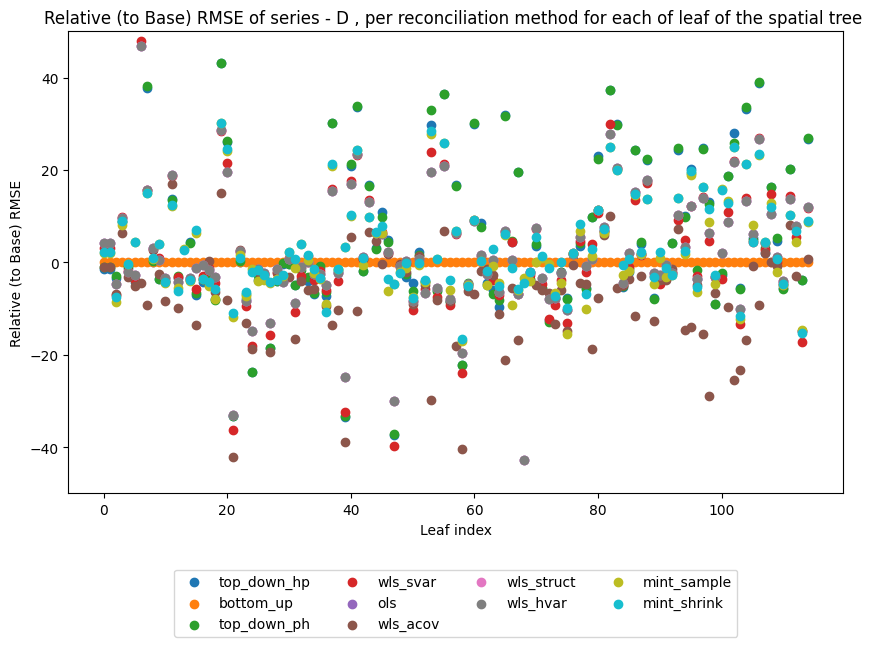

In [ ]:
tree=Tree( dfData= df_data , sType='spatial') 
metric='RMSE'
relative='Base'
#relative='top_down_hp'

dfResults_relative=None


for level in ['D']:
    for  leaf in range(tree.mY.shape[0]):
        ddOutputs=dddCVOutputs[leaf]
        if dfResults_relative is  None:
            dfResults_relative=pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , slices=slices , rolling=True, iters=None).loc[level].loc[:,relative]).T.reset_index(drop=True)
        dfResults_relative=pd.concat([dfResults_relative,pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , slices=slices , rolling=True, iters=None).loc[level].loc[:,relative]).T.reset_index(drop=True)])
        dfResults_relative.reset_index(drop=True,  inplace=True)
        
    # dfResults.drop(columns=['bottom_up'], inplace=True)    
    plt.figure(figsize=(10, 6))

    # Scatter plots for each column with the index as x-axis
    for method in dfResults_relative.columns:
        plt.scatter(dfResults_relative.index, dfResults_relative[method], label=method)
    plt.xlabel('Leaf index')
    plt.ylim(-50,50)
    plt.ylabel(f'Relative (to {relative}) {metric}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    plt.title(f'Relative (to {relative}) {metric} of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
    plt.show()

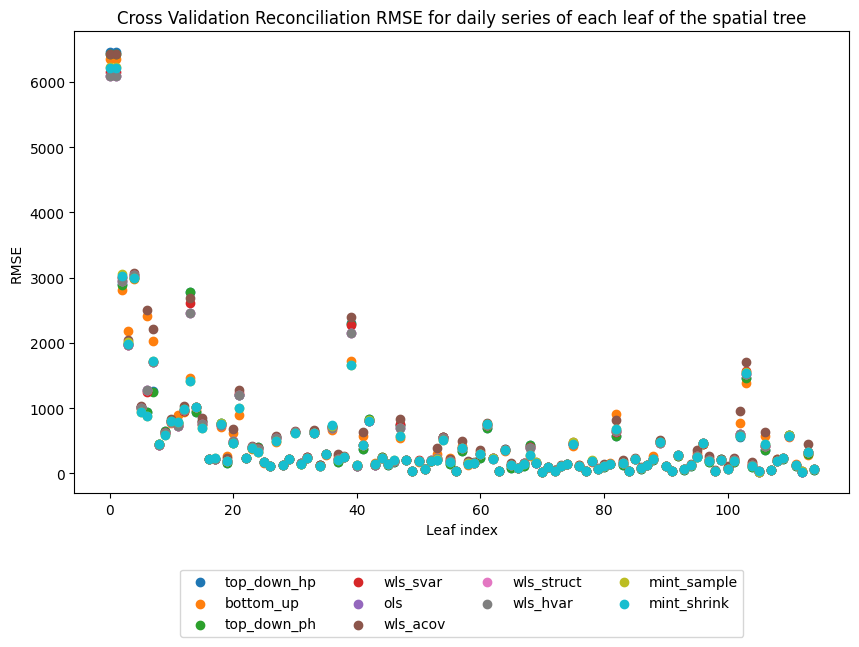

In [10]:
import matplotlib.ticker as ticker

metric='RMSE'
dfResults_absolute=None
for level in ['D']:
    for  leaf in range(tree.mY.shape[0]):
        ddOutputs=dddCVOutputs[leaf]
        if dfResults_absolute is  None:
            dfResults_absolute=pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , 
                                                         slices=slices , 
                                                         rolling=True, 
                                                         relative=False,
                                                         iters=None).loc[level]).T.reset_index(drop=True)
        dfResults_absolute=pd.concat([dfResults_absolute,pd.DataFrame(data=getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , 
                                                         slices=slices , 
                                                         rolling=True, 
                                                         relative=False,
                                                         iters=None).loc[level]).T.reset_index(drop=True)])
        dfResults_absolute.reset_index(drop=True,  inplace=True)
         
    plt.figure(figsize=(10, 6))

    # Scatter plots for each column with the index as x-axis
    for method in dfResults_absolute.columns:
        plt.scatter(dfResults_absolute.index, dfResults_absolute[method], label=method)
    plt.xlabel('Leaf index')
    # plt.ylim(0,50)
    plt.ylabel(f'{metric}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    plt.title(f'Cross Validation Reconciliation {metric} for daily series of each leaf of the spatial tree')
    plt.show()

plt.show()

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


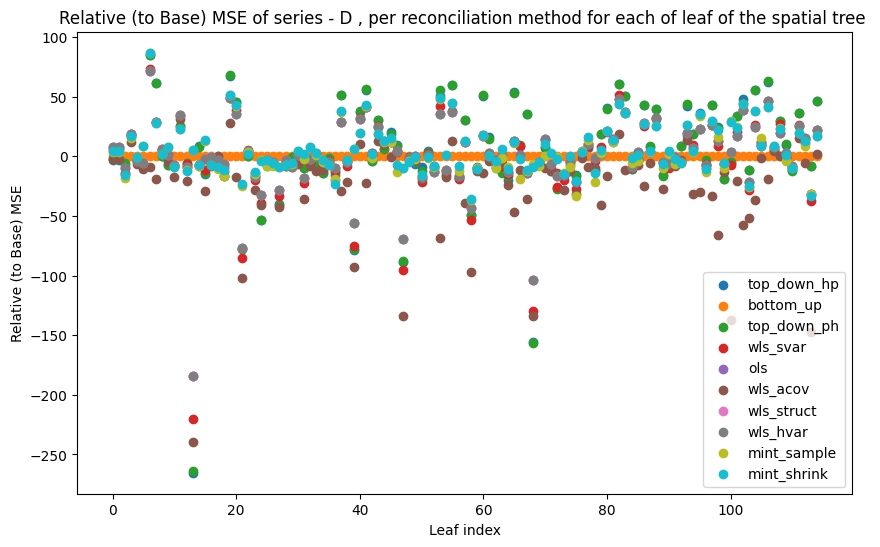

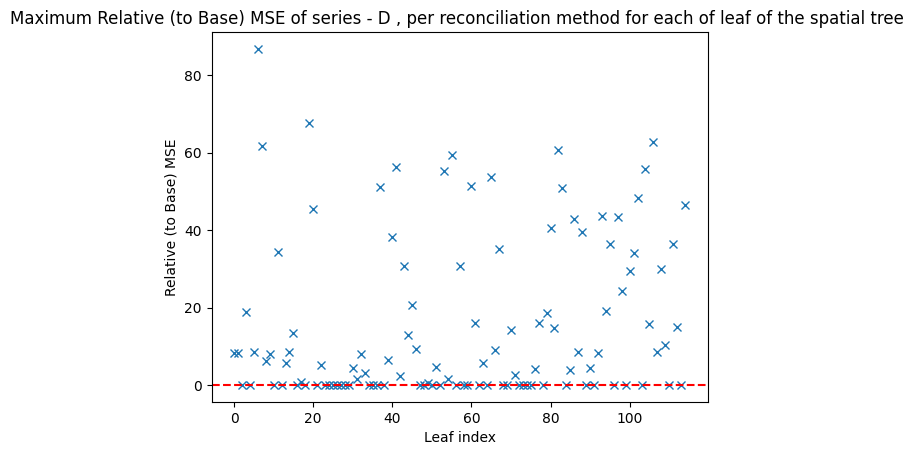

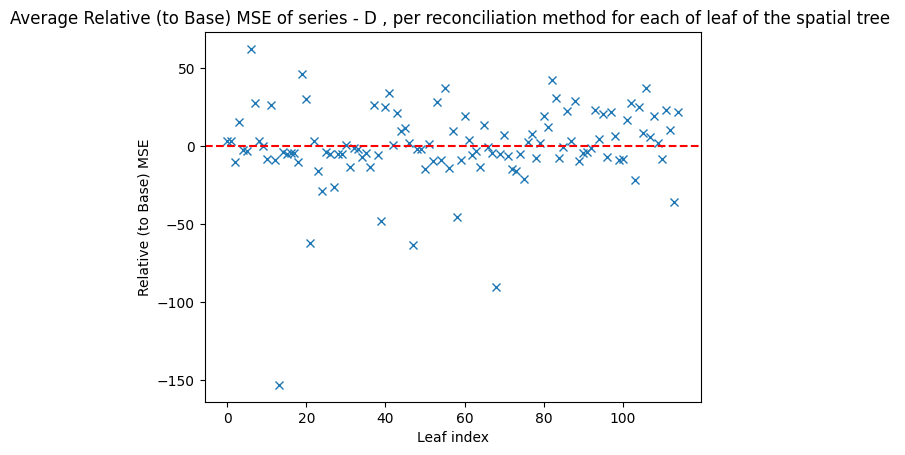

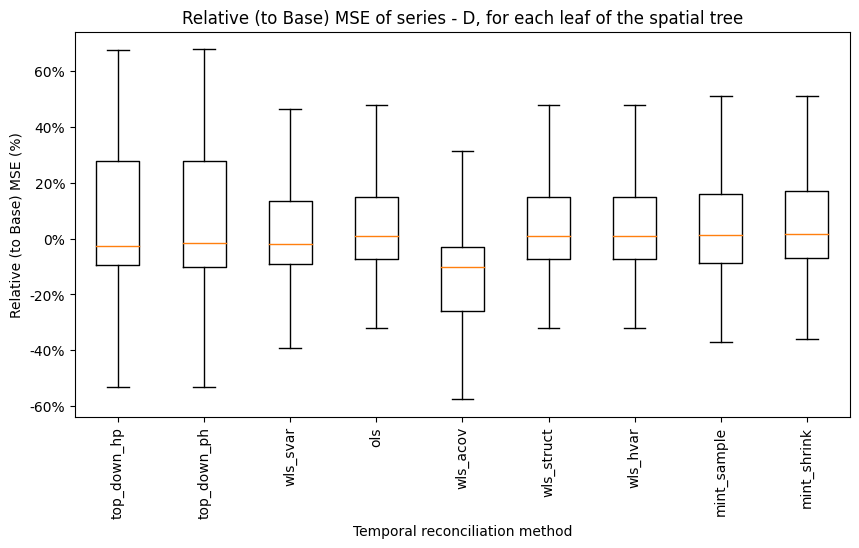

Table of counts the method was highest relative MSE best in 113 temporal trees
______________________________________
bottom_up      42
mint_sample     7
mint_shrink    12
ols            10
top_down_hp    21
top_down_ph    19
wls_acov        2
wls_svar        2
dtype: int64
______________________________________


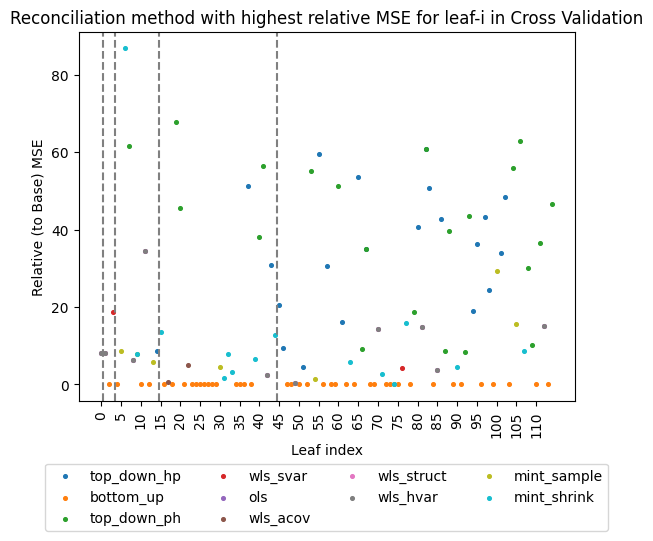

In [ ]:
tree=Tree( dfData= df_data , sType='spatial') 
metric='MSE'
relative='Base'

#relative='top_down_hp'

dfResults_relative=None


for level in ['D']:
    for  leaf in range(tree.mY.shape[0]):
        ddOutputs=dddCVOutputs[leaf]
        if dfResults_relative is  None:
            dfResults_relative=pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , slices=slices , rolling=True, iters=None).loc[level].loc[:,relative]).T.reset_index(drop=True)
        dfResults_relative=pd.concat([dfResults_relative,pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , slices=slices , rolling=True, iters=None).loc[level].loc[:,relative]).T.reset_index(drop=True)])
        dfResults_relative.reset_index(drop=True,  inplace=True)
        
    # dfResults.drop(columns=['bottom_up'], inplace=True)    
    plt.figure(figsize=(10, 6))

    # Scatter plots for each column with the index as x-axis
    for method in dfResults_relative.columns:
        plt.scatter(dfResults_relative.index, dfResults_relative[method], label=method)
    plt.xlabel('Leaf index')
    # plt.ylim(0,50)
    plt.ylabel(f'Relative (to {relative}) MSE')
    plt.legend()
    plt.title(f'Relative (to {relative}) MSE of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
    plt.show()
    
    
plt.plot(dfResults_relative.T.max(), linestyle='',marker='x')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Leaf index')
plt.ylabel(f'Relative (to {relative}) MSE')
plt.title(f'Maximum Relative (to {relative}) MSE of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
plt.show()


plt.plot(dfResults_relative.T.mean(), linestyle='',marker='x')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Leaf index')
plt.ylabel(f'Relative (to {relative}) MSE')
plt.title(f'Average Relative (to {relative}) MSE of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
plt.show()



import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))  # Adjust height
plt.boxplot(dfResults_relative.drop(columns=['bottom_up']), labels=dfResults_relative.drop(columns=['bottom_up']).columns, showfliers=False)
plt.xlabel('Temporal reconciliation method')
plt.xticks(rotation=90)
plt.ylabel(f'Relative (to {relative}) MSE (%)')  # Update label to reflect percentage
plt.title(f'Relative (to {relative}) MSE of series - {level}, for each leaf of the spatial tree')

# Format y-axis tick labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.show()

        
sr=dfResults_relative.T.idxmax()
print('Table of counts the method was highest relative MSE best in 113 temporal trees')
print("______________________________________")
print(sr.groupby(sr.values).count())
print("______________________________________")


df=dfResults_relative.apply(lambda row: row.where(row == row.max()), axis=1)
for method in dfResults_relative.columns:
    plt.scatter(df.index, df[method], label=method,s=7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.title('Reconciliation method with highest relative MSE for leaf-i in Cross Validation')
plt.xlabel('Leaf index')
plt.xticks(ticks=df.index[::5], labels=df.index[::5], rotation=90)
plt.axvline(x=0.5,linestyle="--",color='grey')
plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('Relative (to Base) MSE')
plt.show()

In [70]:
dfResults_relative

Method,top_down_hp,bottom_up,top_down_ph,wls_svar,ols,wls_acov,wls_struct,wls_hvar,mint_sample,mint_shrink
0,1.51,0.00,1.65,9.34,9.31,3.42,9.31,9.31,9.34,9.34
1,1.51,0.00,1.65,9.34,9.31,3.42,9.31,9.31,9.34,9.34
2,-20.68,0.00,-19.00,-14.26,-21.16,-14.19,-21.16,-21.16,-24.56,-24.45
3,15.79,0.00,15.56,15.17,17.32,15.03,17.32,17.32,8.38,8.60
4,-10.17,0.00,-10.40,-4.94,-5.24,-1.14,-5.24,-5.24,-9.05,-8.87
...,...,...,...,...,...,...,...,...,...,...
110,-24.63,0.00,-23.14,-14.28,-15.49,-15.46,-15.49,-15.49,-20.18,-20.06
111,37.15,0.00,37.19,32.50,32.65,22.80,32.65,32.65,23.37,24.08
112,14.00,0.00,14.84,12.10,18.12,-17.62,18.12,18.12,6.16,10.87
113,-7.05,0.00,-5.78,-26.37,-21.64,-45.83,-21.64,-21.64,-20.06,-21.80


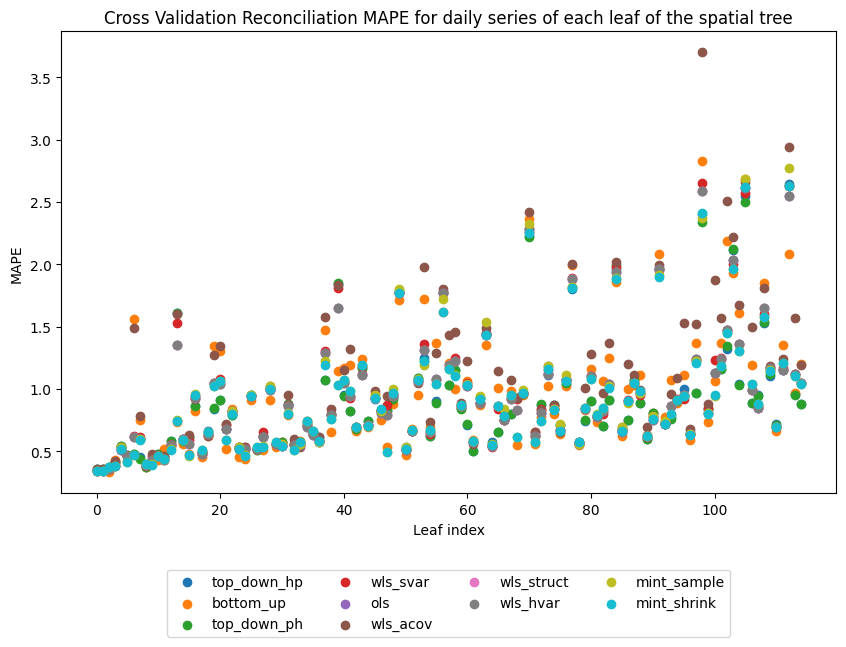

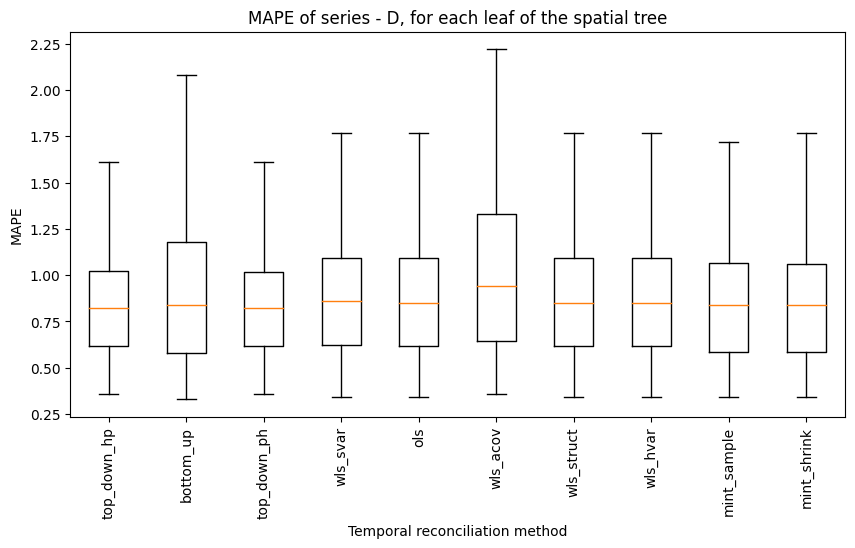

In [13]:
import matplotlib.ticker as ticker

metric='MAPE'
dfResults_absolute=None
for level in ['D']:
    for  leaf in range(tree.mY.shape[0]):
        ddOutputs=dddCVOutputs[leaf]
        if dfResults_absolute is  None:
            dfResults_absolute=pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , 
                                                         slices=slices , 
                                                         rolling=True, 
                                                         relative=False,
                                                         iters=None).loc[level]).T.reset_index(drop=True)
        dfResults_absolute=pd.concat([dfResults_absolute,pd.DataFrame(data=getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , 
                                                         slices=slices , 
                                                         rolling=True, 
                                                         relative=False,
                                                         iters=None).loc[level]).T.reset_index(drop=True)])
        dfResults_absolute.reset_index(drop=True,  inplace=True)
         
    plt.figure(figsize=(10, 6))

    # Scatter plots for each column with the index as x-axis
    for method in dfResults_absolute.columns:
        plt.scatter(dfResults_absolute.index, dfResults_absolute[method], label=method)
    plt.xlabel('Leaf index')
    # plt.ylim(0,50)
    plt.ylabel(f'{metric}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    plt.title(f'Cross Validation Reconciliation {metric} for daily series of each leaf of the spatial tree')
    plt.show()

plt.figure(figsize=(10, 5))  # Adjust height
plt.boxplot(dfResults_absolute, labels=dfResults_absolute.columns, showfliers=False)
plt.xlabel('Temporal reconciliation method')
plt.xticks(rotation=90)
plt.ylabel(f'{metric}') 
plt.title(f'{metric} of series - {level}, for each leaf of the spatial tree')

# Format y-axis tick labels as percentages

# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.show()

### if weekly series are bad, TD is bad and all methods but bottom-up  are bad. How can we ttell when weekly is bad ? From insample errors. MINT and other WLS methods do  not generalize well

### Temporal reconciliation is better than bottom-up in half of the leafs , with significant improvement. But which method to choose for which leaf?

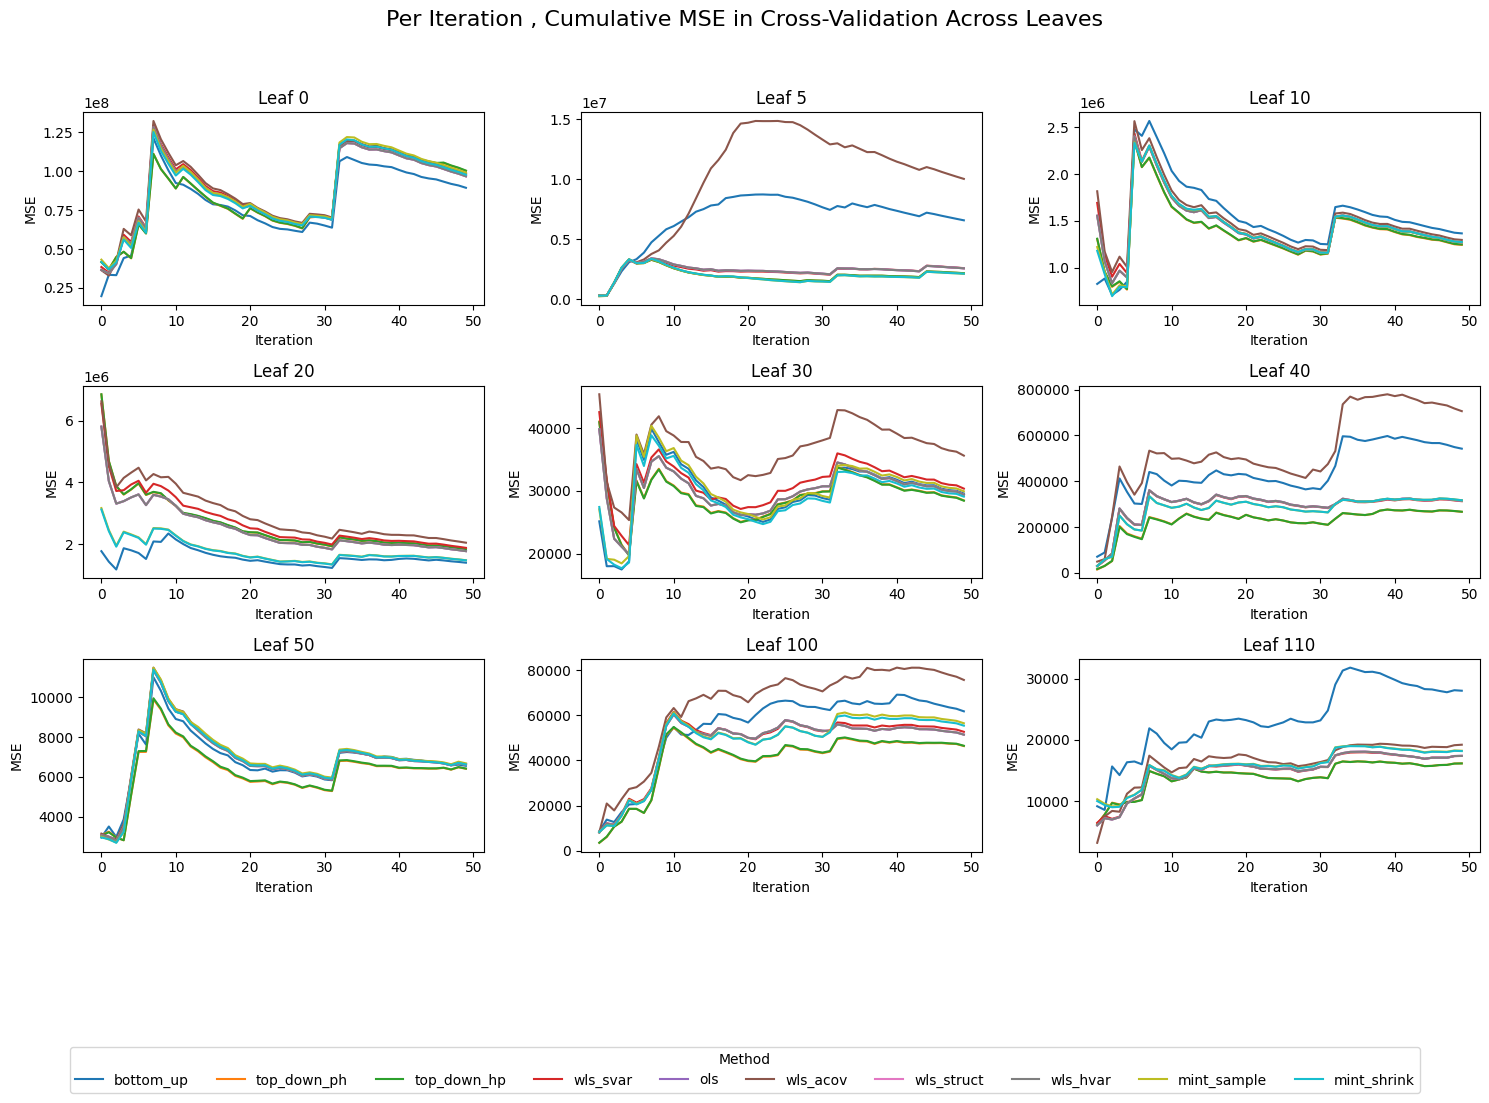

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# List of leaf nodes
leaves = [0, 5, 10, 20 ,30 ,40 , 50, 100, 110]


# Create a 3x3 figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Prepare to collect lines and labels for a single legend
lines = []
labels = []

# Iterate over each leaf and corresponding subplot
for idx, leaf in enumerate(leaves):
    ddOutputs = dddCVOutputs[leaf]

    horizon = 1
    relative = 'Base'
    level = 'D'
    iters = int(ddOutputs['bottom_up']['mYhat'].shape[1] / horizon)
    metric = 'MSE'

    lMethods = list(ddOutputs.keys())

    ax = axes[idx]  # Select subplot
    for method in lMethods:
        vValues = np.zeros(iters)

        for iter in range(1, iters + 1):
            vValues[iter - 1] = getCVResults(
                h=horizon,
                iOoS=horizon,
                ddOutputs=ddOutputs,
                metric=metric,
                slices=[7, 1],
                iters=iter,
                rolling=False,
                relative=False,
            )[method].loc[level]

        vCumAvg = np.cumsum(vValues) / np.arange(1, len(vValues) + 1)
        line, = ax.plot(
            np.arange(iters),
            vCumAvg,
            linestyle="-",
            label=method,
        )
        
        # Collect lines and labels for the shared legend
        if idx == 0:  # Only collect once (from the first subplot)
            lines.append(line)
            labels.append(method)

    ax.set_title(f"Leaf {leaf}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel(metric)

# Hide unused subplots if less than 9
for i in range(len(leaves), 9):
    fig.delaxes(axes[i])

# Add a shared legend outside the grid

# Add global title
plt.suptitle("Per Iteration , Cumulative MSE in Cross-Validation Across Leaves", fontsize=16)

# Adjust layout
fig.legend(
    lines,
    labels,
    title="Method",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),  # Move the legend closer to the graphs
    ncol=11,
)

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # In # Leave space for the global title and legend
plt.show()


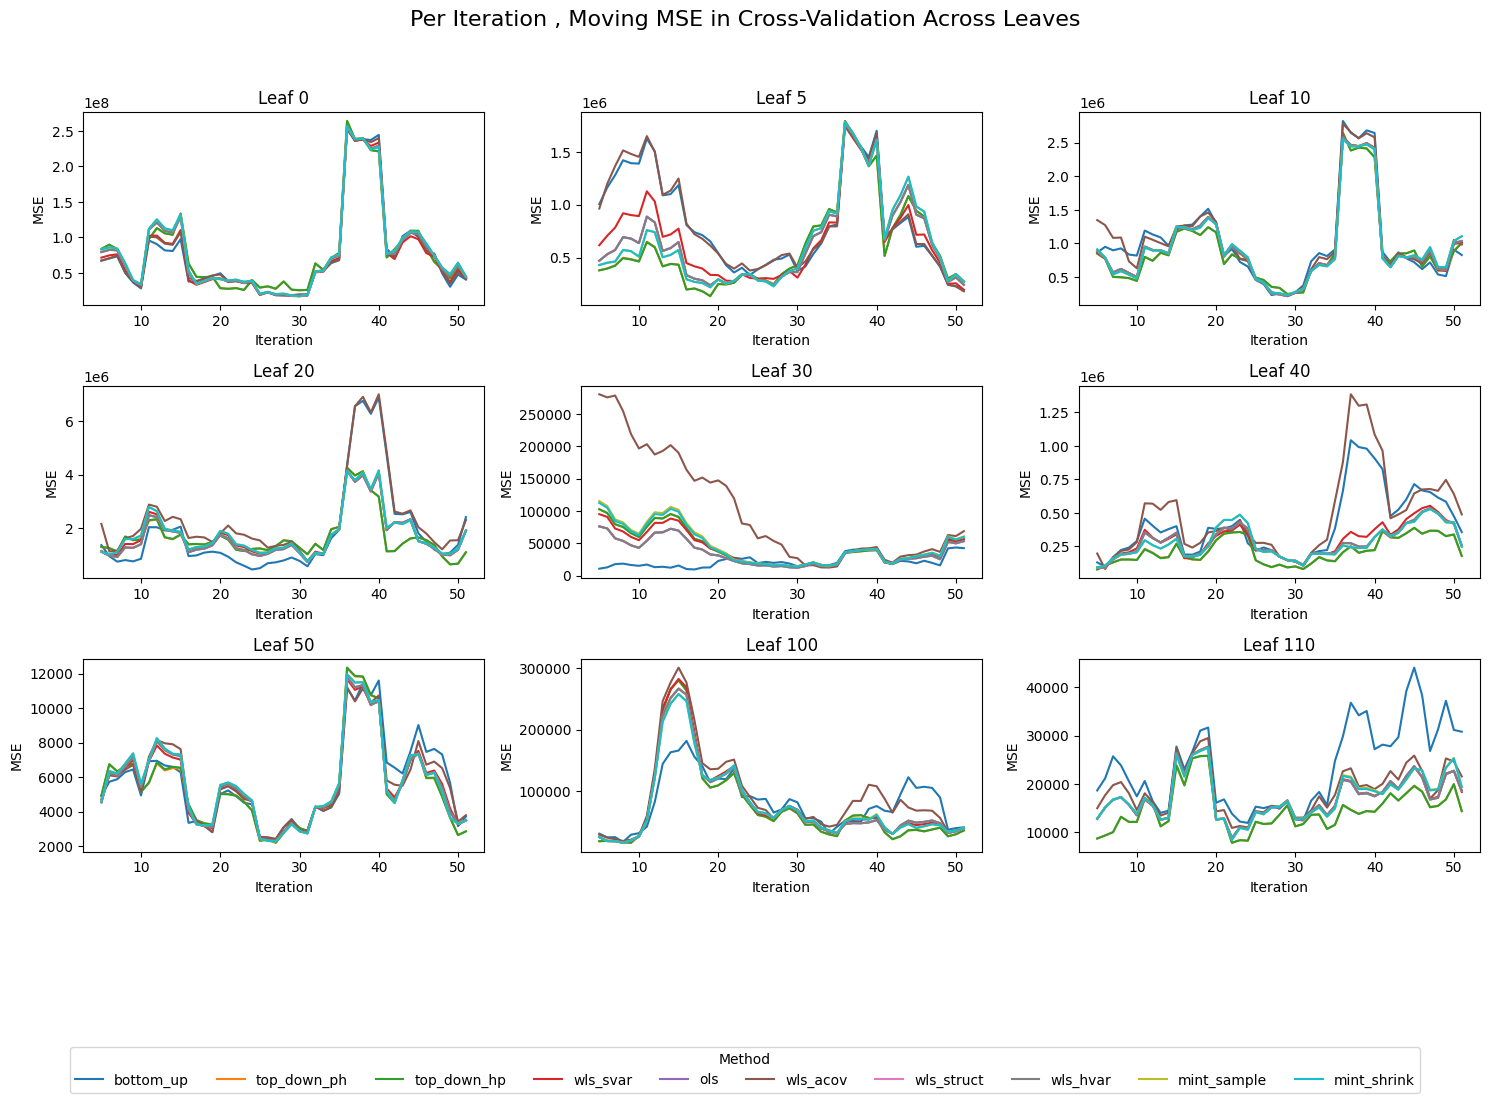

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of leaf nodes
leaves = [0, 5, 10, 20, 30, 40, 50, 100, 110]

# Create a 3x3 figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Prepare to collect lines and labels for a single legend
lines = []
labels = []

# Iterate over each leaf and corresponding subplot
for idx, leaf in enumerate(leaves):
    ddOutputs = dddCVOutputs[leaf]

    horizon = 1
    relative = 'Base'
    level = 'D'
    iters = int(ddOutputs['bottom_up']['mYhat'].shape[1] / horizon)
    metric = 'MSE'

    lMethods = list(ddOutputs.keys())

    ax = axes[idx]  # Select subplot
    for method in lMethods:
        vValues = np.zeros(iters)

        for iter in range(1, iters + 1):
            vValues[iter - 1] = getCVResults(
                h=horizon,
                iOoS=horizon,
                ddOutputs=ddOutputs,
                metric=metric,
                slices=[7, 1],
                iters=iter,
                rolling=False,
                relative=False,
            )[method].loc[level]

        # Calculate moving average with window size of 5
        vMovingAvg = np.convolve(vValues, np.ones(5)/5, mode='valid')
        
        # Adjust x-axis to match the length of vMovingAvg
        x_axis = np.arange(5, iters + 1)  # Start from 5 to match the length of vMovingAvg

        line, = ax.plot(
            x_axis,
            vMovingAvg,
            linestyle="-",
            label=method,
        )

        # Collect lines and labels for the shared legend
        if idx == 0:  # Only collect once (from the first subplot)
            lines.append(line)
            labels.append(method)

    ax.set_title(f"Leaf {leaf}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel(metric)

# Hide unused subplots if less than 9
for i in range(len(leaves), 9):
    fig.delaxes(axes[i])

# Add a shared legend outside the grid

# Add global title
plt.suptitle("Per Iteration , Moving MSE in Cross-Validation Across Leaves", fontsize=16)

# Adjust layout
fig.legend(
    lines,
    labels,
    title="Method",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),  # Move the legend closer to the graphs
    ncol=11,
)

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Leave space for the global title and legend
plt.show()


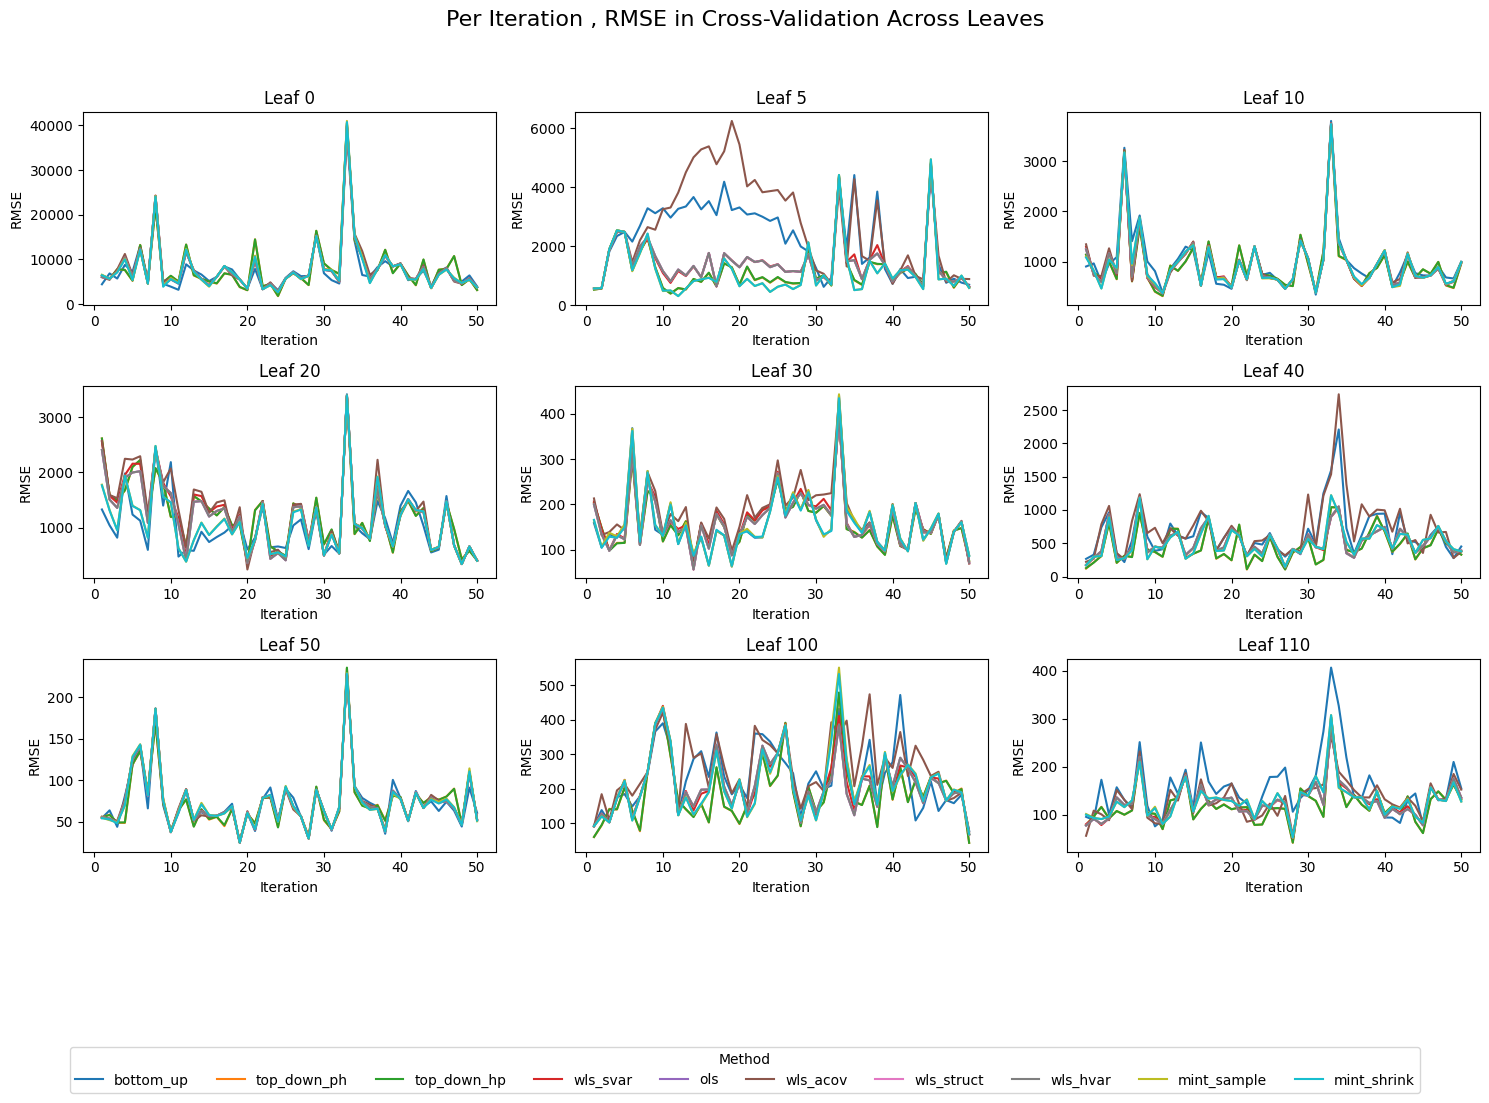

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# List of leaf nodes
leaves = [0, 5, 10, 20, 30, 40, 50, 100, 110]

# Create a 3x3 figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Prepare to collect lines and labels for a single legend
lines = []
labels = []

# Iterate over each leaf and corresponding subplot
for idx, leaf in enumerate(leaves):
    ddOutputs = dddCVOutputs[leaf]

    horizon = 1
    relative = 'Base'
    level = 'D'
    iters = int(ddOutputs['bottom_up']['mYhat'].shape[1] / horizon)
    metric = 'RMSE'

    lMethods = list(ddOutputs.keys())

    ax = axes[idx]  # Select subplot
    for method in lMethods:
        vValues = np.zeros(iters)

        for iter in range(1, iters + 1):
            vValues[iter - 1] = getCVResults(
                h=horizon,
                iOoS=horizon,
                ddOutputs=ddOutputs,
                metric=metric,
                slices=[7, 1],
                iters=iter,
                rolling=False,
                relative=False,
            )[method].loc[level]

        # Calculate moving average with window size of 5
        
        
        # Adjust x-axis to match the length of vMovingAvg
        x_axis = np.arange(1, iters + 1)  # Start from 1 

        line, = ax.plot(
            x_axis,
            vValues,
            linestyle="-",
            label=method,
        )

        # Collect lines and labels for the shared legend
        if idx == 0:  # Only collect once (from the first subplot)
            lines.append(line)
            labels.append(method)

    ax.set_title(f"Leaf {leaf}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel(metric)

# Hide unused subplots if less than 9
for i in range(len(leaves), 9):
    fig.delaxes(axes[i])

# Add a shared legend outside the grid

# Add global title
plt.suptitle("Per Iteration , RMSE in Cross-Validation Across Leaves", fontsize=16)

# Adjust layout
fig.legend(
    lines,
    labels,
    title="Method",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),  # Move the legend closer to the graphs
    ncol=11,
)

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Leave space for the global title and legend
plt.show()


### Temporal reconciliation does not generalize well, there is a very high variance in which method is the best from week to week

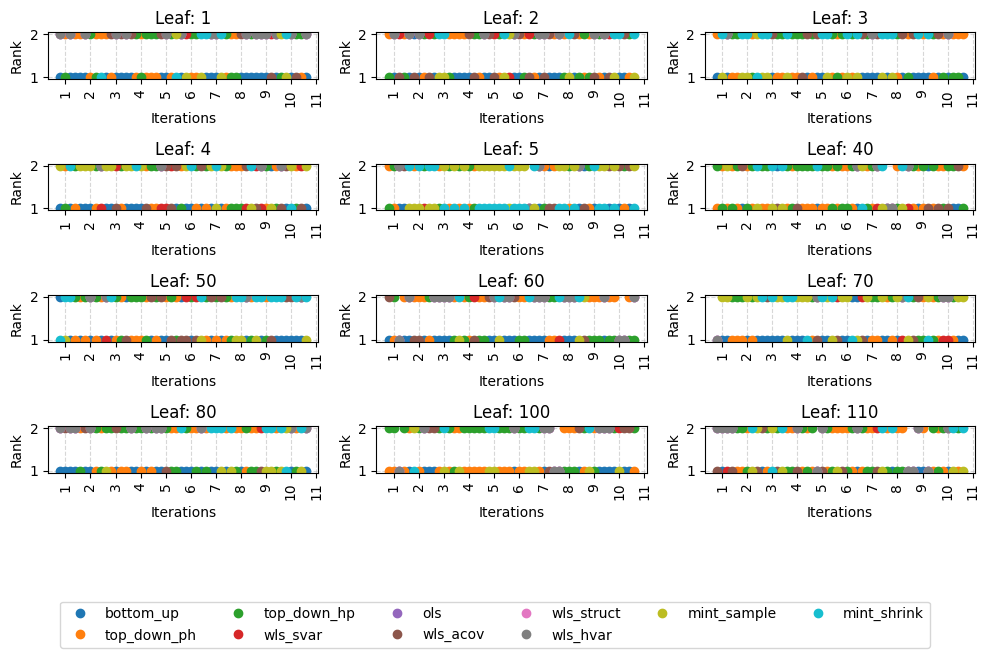

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

leaves = [1, 2, 3, 4, 5, 40, 50, 60 ,70, 80, 100, 110]

# Create a 3x3 grid for subplots, make the plots smaller to reduce white space
fig, axes = plt.subplots(4, 3, figsize=(10, 6))  # Adjusted size to reduce white space
axes = axes.flatten()

for idx, leaf in enumerate(leaves):
    ddOutputs = dddCVOutputs[leaf]

    horizon = 1
    relative = 'Base'
    level = 'D'
    iters = int(ddOutputs['bottom_up']['mYhat'].shape[1] / horizon)
    metric = 'MSE'

    lMethods = list(ddOutputs.keys())
    df_values = pd.DataFrame()

    for method in lMethods:
        for iter in range(1, iters + 1):
            # Populate the DataFrame with results
            df_values.loc[method, str(iter)] = getCVResults(
                h=horizon,
                iOoS=horizon,
                ddOutputs=ddOutputs,
                metric=metric,
                slices=[7, 1],
                iters=iter,
                rolling=False,
                relative=False,
            )[method].loc[level]

    # Rank values column-wise
    df_values = df_values.rank(method='min', axis=0)
    
    # Transpose and filter ranks < 3, then plot as dots
    df_to_plot = df_values[df_values < 3].T
    ax = axes[idx]
    for method in df_to_plot.columns:
        ax.plot(
            df_to_plot.index, df_to_plot[method], 'o', label=method if idx == 0 else ""
        )

    # Customize subplot
    ax.set_title(f"Leaf: {leaf}")
    ax.set_yticks([1, 2])  # Show only y-ticks 1 and 2
    ax.set_ylabel("Rank")
    ax.set_xlabel("Iterations")
    ax.grid(True, linestyle='--', alpha=0.5)

    # Rotate x-axis labels 90 degrees and limit the number of ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xticks(np.arange(1, 52, 5))  # Adjust tick spacing

# Remove any unused subplots (if less than 9 leaves)
for extra_ax in axes[len(leaves):]:
    fig.delaxes(extra_ax)

# Add a single legend outside the grid (only once)
handles, labels = axes[0].get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))
fig.legend(
    unique_handles_labels.values(),
    unique_handles_labels.keys(),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=6,
)

# Adjust layout and show the plot, tighten layout further to reduce white space
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the legend
plt.show()


In [24]:
lMethods

['bottom_up',
 'top_down_ph',
 'top_down_hp',
 'wls_svar',
 'ols',
 'wls_acov',
 'wls_struct',
 'wls_hvar',
 'mint_sample',
 'mint_shrink']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

leaves = [1, 2, 3, 4, 5, 40, 50, 60 ,70, 80, 100, 110]

# Create a 3x3 grid for subplots, make the plots smaller to reduce white space
fig, axes = plt.subplots(4, 3, figsize=(10, 6))  # Adjusted size to reduce white space
axes = axes.flatten()

for idx, leaf in enumerate(leaves):
    ddOutputs = dddCVOutputs[leaf]

    horizon = 1
    relative = 'Base'
    level = 'D'
    iters = int(ddOutputs['bottom_up']['mYhat'].shape[1] / horizon)
    metric = 'MSE'

    lMethods = list(ddOutputs.keys())
    df_values = pd.DataFrame()

    for method in lMethods:
        for iter in range(1, iters + 1):
            # Populate the DataFrame with results
            df_values.loc[method, str(iter)] = getCVResults(
                h=horizon,
                iOoS=horizon,
                ddOutputs=ddOutputs,
                metric=metric,
                slices=[7, 1],
                iters=iter,
                rolling=False,
                relative=False,
            )[method].loc[level]

    # Rank values column-wise
    df_values = df_values.rank(method='min', axis=0)
    
    # Transpose and filter ranks < 3, then plot as dots
    df_to_plot = df_values[df_values < 3].T
    ax = axes[idx]
    for method in df_to_plot.columns:
        ax.plot(
            df_to_plot.index, df_to_plot[method], 'o', label=method if idx == 0 else ""
        )

    # Customize subplot
    ax.set_title(f"Leaf: {leaf}")
    ax.set_yticks([1, 2])  # Show only y-ticks 1 and 2
    ax.set_ylabel("Rank")
    ax.set_xlabel("Iterations")
    ax.grid(True, linestyle='--', alpha=0.5)

    # Rotate x-axis labels 90 degrees and limit the number of ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xticks(np.arange(1, 52, 5))  # Adjust tick spacing

# Remove any unused subplots (if less than 9 leaves)
for extra_ax in axes[len(leaves):]:
    fig.delaxes(extra_ax)

# Add a single legend outside the grid (only once)
handles, labels = axes[0].get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))
fig.legend(
    unique_handles_labels.values(),
    unique_handles_labels.keys(),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=6,
)

# Adjust layout and show the plot, tighten layout further to reduce white space
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the legend
plt.show()


### In Sample resuts

In [14]:

transform='log'
dfHolidays=df_holidays

forecast_method='prophet'
iOoS=7
l_methods=["bottom_up", "top_down_ph" ,"top_down_hp", 'wls',
                  "ols" ,'mint_sample','mint_shrink','mint_diag']
l_methods_temporal=["bottom_up", "top_down_ph" ,"top_down_hp","wls_svar" , "ols",
                    "wls_acov", "wls_struct" , "wls_hvar" , "mint_sample", "mint_shrink"]
dddISmatrices={}


tree_spatial=Tree( dfData= df_data , sType='spatial') 
for leaf in range(tree_spatial.mY.shape[0]):
    dddISmatrices[leaf]={}
    df_data_leaf=pd.DataFrame(data=tree_spatial.mY[leaf,:-365], index=tree_spatial.date_time_index[:-365] , columns=['y'])
    tree_temporal=Tree(dfData=df_data_leaf, sType='temporal', iLeaf=leaf)
    tree_temporal.forecast_prophet(iOoS=7,sTransform=transform, mX=None,
                                   dfHolidays=df_holidays)
    for method in l_methods_temporal:
        tree_temporal.reconcile(method)
        dddISmatrices[leaf][method]={}
        dddISmatrices[leaf][method]['mYtilde']=tree_temporal.mYtildeIS
        dddISmatrices[leaf][method]['mYtrue']=tree_temporal.mY
        dddISmatrices[leaf][method]['mYhat']=tree_temporal.mYhat


   

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


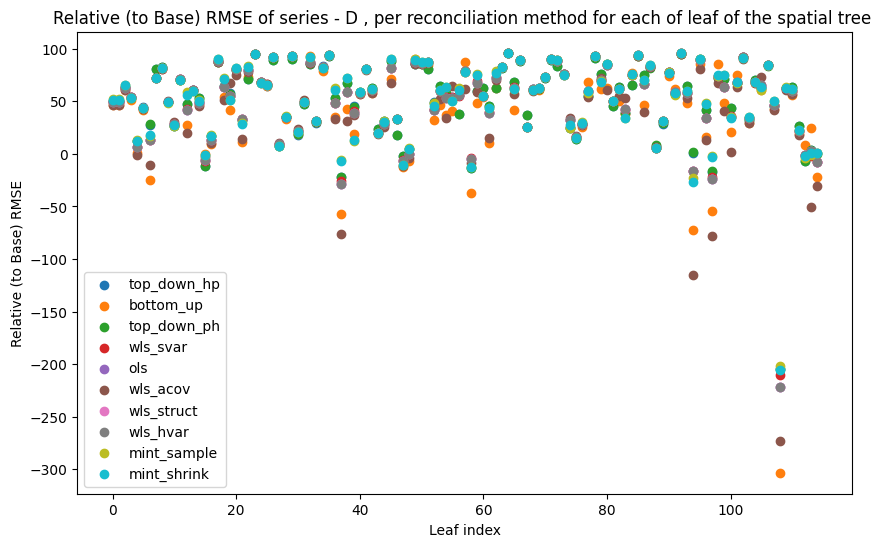

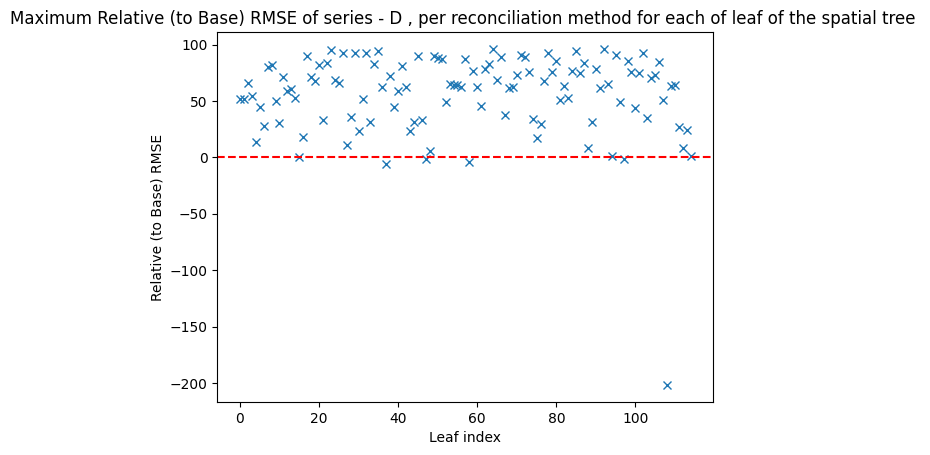

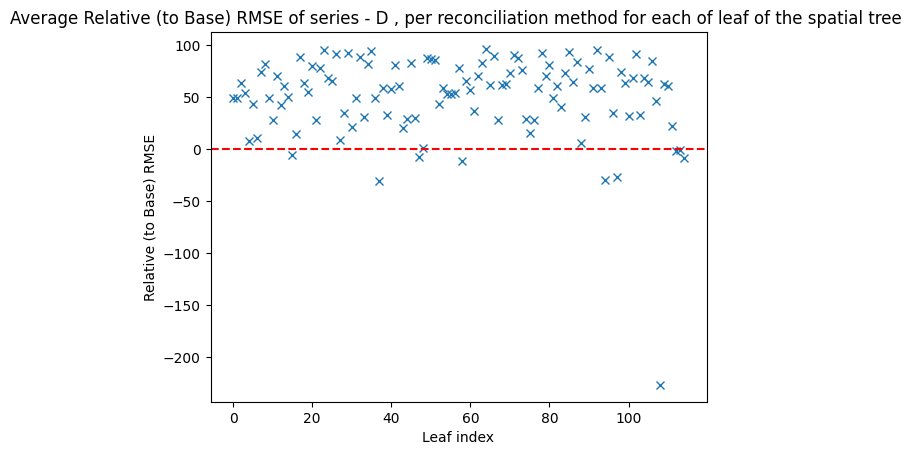

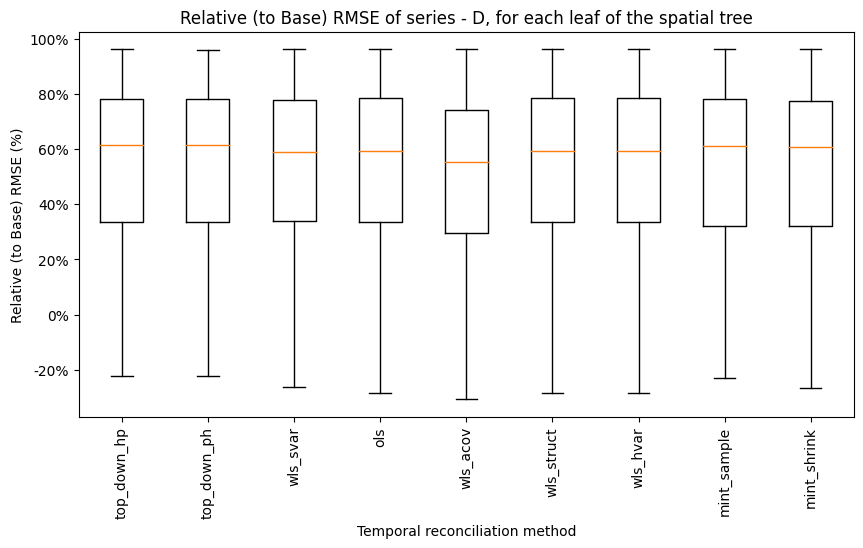

Table of counts the method was highest relative RMSE best in 113 temporal trees
______________________________________
bottom_up      14
mint_sample    38
mint_shrink     4
ols             1
top_down_hp    16
top_down_ph    17
wls_acov       22
wls_svar        3
dtype: int64
______________________________________


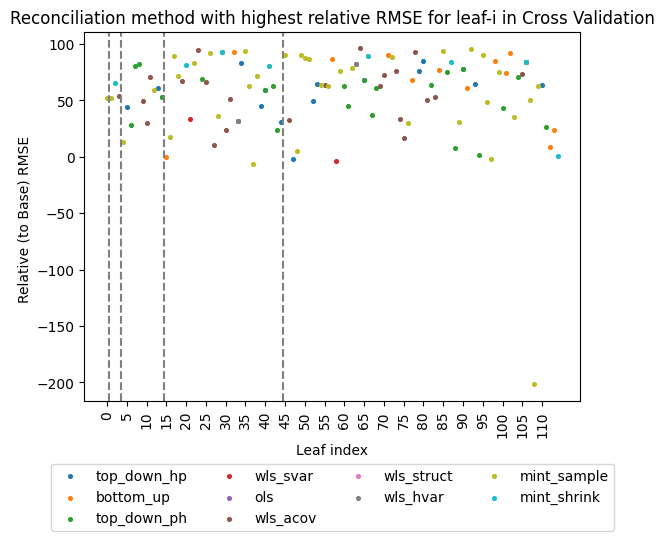

In [29]:
tree=Tree( dfData= df_data , sType='spatial') 
metric='RMSE'
relative='Base'
#relative='top_down_hp'

dfResults_relative=None


for level in ['D']:
    for  leaf in range(tree.mY.shape[0]):
        ddOutputs=dddISmatrices[leaf]
        if dfResults_relative is  None:
            dfResults_relative=pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , slices=slices , rolling=True, iters=None).loc[level].loc[:,relative]).T.reset_index(drop=True)
        dfResults_relative=pd.concat([dfResults_relative,pd.DataFrame(getCVResults( h=1, iOoS=1, ddOutputs=ddOutputs , metric=metric , slices=slices , rolling=True, iters=None).loc[level].loc[:,relative]).T.reset_index(drop=True)])
        dfResults_relative.reset_index(drop=True,  inplace=True)
        
    # dfResults.drop(columns=['bottom_up'], inplace=True)    
    plt.figure(figsize=(10, 6))

    # Scatter plots for each column with the index as x-axis
    for method in dfResults_relative.columns:
        plt.scatter(dfResults_relative.index, dfResults_relative[method], label=method)
    plt.xlabel('Leaf index')
    # plt.ylim(0,50)
    plt.ylabel(f'Relative (to {relative}) {metric}')
    plt.legend()
    plt.title(f'Relative (to {relative}) {metric} of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
    plt.show()
    
    
plt.plot(dfResults_relative.T.max(), linestyle='',marker='x')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Leaf index')
plt.ylabel(f'Relative (to {relative}) {metric}')
plt.title(f'Maximum Relative (to {relative}) {metric} of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
plt.show()


plt.plot(dfResults_relative.T.mean(), linestyle='',marker='x')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Leaf index')
plt.ylabel(f'Relative (to {relative}) {metric}')
plt.title(f'Average Relative (to {relative}) {metric} of series - {level} , per reconciliation method for each of leaf of the spatial tree ')
plt.show()



import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))  # Adjust height
plt.boxplot(dfResults_relative.drop(columns=['bottom_up']), labels=dfResults_relative.drop(columns=['bottom_up']).columns, showfliers=False)
plt.xlabel('Temporal reconciliation method')
plt.xticks(rotation=90)
plt.ylabel(f'Relative (to {relative}) {metric} (%)')  # Update label to reflect percentage
plt.title(f'Relative (to {relative}) {metric} of series - {level}, for each leaf of the spatial tree')

# Format y-axis tick labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.show()

        
sr=dfResults_relative.T.idxmax()
print(f'Table of counts the method was highest relative {metric} best in 113 temporal trees')
print("______________________________________")
print(sr.groupby(sr.values).count())
print("______________________________________")


df=dfResults_relative.apply(lambda row: row.where(row == row.max()), axis=1)
for method in dfResults_relative.columns:
    plt.scatter(df.index, df[method], label=method,s=7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.title(f'Reconciliation method with highest relative {metric} for leaf-i in Cross Validation')
plt.xlabel('Leaf index')
plt.xticks(ticks=df.index[::5], labels=df.index[::5], rotation=90)
plt.axvline(x=0.5,linestyle="--",color='grey')
plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel(f'Relative (to Base) {metric} ')
plt.show()

In [15]:
leaf=0
tree_spatial=Tree( dfData= df_data , sType='spatial') 
df_data_leaf=pd.DataFrame(data=tree_spatial.mY[leaf,:], index=tree_spatial.date_time_index[:] , columns=['y'])

tree_temporal=Tree(dfData=df_data_leaf, sType='temporal', iLeaf=leaf)

############
ddOutputs=tree_temporal.cross_validation(sTransform='log', dfHolidays=df_holidays,
                                iInitial=int(tree_temporal.mY.shape[1]*0.8),
                                iPeriod=time_converter(iOoS, from_unit='D' , to_unit='W'),
                                iHorizon=time_converter(iOoS, from_unit='D' , to_unit='W'),
                                lMethods=l_methods_temporal, sForecastMethod='prophet'
                                )
df_temporal_cv_results=getCVResults(h=time_converter(iOoS, from_unit='D' , to_unit='W'), 
                iOoS=time_converter(iOoS, from_unit='D' , to_unit='W'),
                ddOutputs=ddOutputs, metric='RMSE', 
                slices=[7,1],  #TODO
                rolling=True, iters=None)
sSelectedWeightType = df_temporal_cv_results.loc['D'].idxmax()[0] #[0] compared to base
print(sSelectedWeightType)

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Number of CV folds = 55
mint_sample
